In this part of the exercise, you will build a logistic regression model to
predict whether a student gets admitted into a university.
Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant’s scores on two exams and the admissions
decision.
Your task is to build a classification model that estimates an applicant’s
probability of admission based the scores from those two exams

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=np.loadtxt("data/ex2data1.txt",delimiter=",")

In [3]:
data[0:5,:]
#first two colums are marks in two diff exams and third column is Admission done or not

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ]])

In [4]:
#Training set feature matrix
X=data[:,0:2]
X.shape

(100, 2)

In [5]:
Y=data[:,2]
Y=Y.reshape((100,1))

Adding column feature x0=1 as a column to X

In [6]:
X=np.hstack((np.ones((100,1)),X))

In [7]:
X.shape

(100, 3)

In [8]:
X[0:5,:]

array([[ 1.        , 34.62365962, 78.02469282],
       [ 1.        , 30.28671077, 43.89499752],
       [ 1.        , 35.84740877, 72.90219803],
       [ 1.        , 60.18259939, 86.3085521 ],
       [ 1.        , 79.03273605, 75.34437644]])

In [9]:
Y[0:5]

array([[0.],
       [0.],
       [0.],
       [1.],
       [1.]])

# Visualizing the data

In [10]:
data_pos=data[data[:,2]==1]
data_neg=data[data[:,2]==0]
X_pos_1=data_pos[:,0]
X_pos_2=data_pos[:,1]
X_neg_1=data_neg[:,0]
X_neg_2=data_neg[:,1]


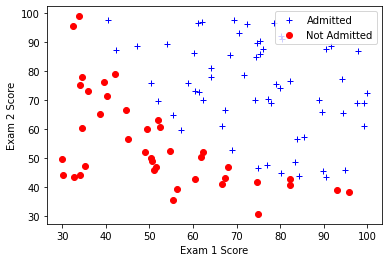

In [11]:
plt.plot(X_pos_1,X_pos_2,"b+",label="Admitted")
plt.plot(X_neg_1,X_neg_2,"ro",label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.legend(loc="upper right");

the logistic regres-
sion hypothesis is defined as:
h θ (x) = g(θ.Tx),
where function g is the sigmoid function. The sigmoid function is defined as:
g(z)=1/(1+e^(-z))


In [12]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

# Initialize theta

In [13]:
theta=np.zeros(3)
theta.shape

(3,)

# Costfunction that will return cost and gradient function to return gradient
Now we will implement the cost function and gradientc function for logistic regression
to return the cost and gradient in 1D numpy array.
Then we will use advanced optimization function fmin_ncg to optimize theta to get minimum value of costfunction


In [107]:
def costfunction(theta,X,Y):
    theta=theta.reshape((3,1))
    m=Y.shape[0]
    J=(-1/m)*(np.dot(Y.T,np.log(sigmoid(np.dot(X,theta)))) + np.dot(1-Y.T,np.log(sigmoid(1-np.dot(X,theta)))))
    J=np.ndarray.flatten(J)
    
    
    return J

In [108]:
def gradientfunction(theta,X,Y):
    m=Y.shape[0]
    theta=theta.reshape((3,1))
    gradient=(1/m)*(np.dot(X.T,sigmoid(np.dot(X,theta)) - Y))
    gradient=np.ndarray.flatten(gradient)
    return gradient

In [109]:
#Initial Cost
print(costfunction(np.array([0,0,0]),X,Y))

[0.54119298]


In [110]:
#Initial gradient
print(gradientfunction(np.array([0,0,0]),X,Y))

[ -0.1        -12.00921659 -11.26284221]


# Optmize Theta with the help of fmin_ncg

In [111]:
from scipy.optimize import fmin_ncg

In [113]:
myargs=(X,Y)

Theta=fmin_ncg(costfunction,x0=np.zeros((3,1)),fprime=gradientfunction,args=myargs)

         Current function value: 0.150824
         Iterations: 24
         Function evaluations: 65
         Gradient evaluations: 160
         Hessian evaluations: 0


In [114]:
#optimized theta
Theta

array([-22.67053848,   0.18629995,   0.18131027])

In [115]:
#minimized value of cost function
costfunction(Theta,X,Y)

array([0.15082361])

# Function to predict Admitted or Not i.e.(0,1) 
if sigmoid(X*Theta) >= 0.5, predict 1 else predict 0

In [116]:
def predict(Theta,X):
    p=sigmoid(np.dot(X,Theta))
    p[p>=0.5]=1
    p[p<0.5]=0
    return p

In [117]:
p=predict(Theta,X)

In [124]:
p

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       1., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1.])

# Training accuracy

In [128]:
def taccuracy(p,Y):
    return ((100-p.sum())/(100-Y.sum()))*100 

In [129]:
accuracy=taccuracy(p,Y)

In [130]:
accuracy

97.5

# Plotting the decision boundary

theta0 + theta1*x1 + theta2*x2=0

x2=(-1/theta2)*(theta0 + theta1*x1)

In [133]:
theta0=Theta[0]
theta1=Theta[1]
theta2=Theta[2]

In [135]:
x1=np.linspace(20,100,2000)
x2=(-1/theta2)*(theta0 + theta1*x1)

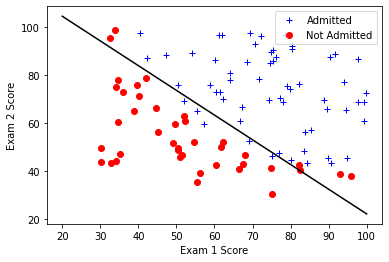

In [136]:
plt.plot(X_pos_1,X_pos_2,"b+",label="Admitted")
plt.plot(X_neg_1,X_neg_2,"ro",label="Not Admitted")
plt.xlabel("Exam 1 Score")
plt.ylabel("Exam 2 Score")
plt.plot(x1,x2,"k")
plt.legend(loc="upper right");

# Thank You